In [17]:
import xgboost as xgb
import pandas as pd
import numpy as np
import os

# Training script for New York City taxi trip data
#
# Author: Tianyu Li
# Created on Feb 13th, 2019

# Load csv files into Pandas
rawdata = pd.read_csv("train.csv")

# Data cleaning helper function for NYC taxi data
#
# Inputs:
# data:pandas data frame to be cleaned)
def clean_data(data):
    # Load csv file into Pandas
    data = pd.read_csv("train.csv")
    
    # Data cleaning
    # Convert id to integer
    data.id = data.id.apply(lambda x: int(str(x)[2:]))
    
    # Convert pickup/dropoff time to unix timestamp
    data.pickup_datetime = data.pickup_datetime.apply(pd.Timestamp)
    data.pickup_datetime = data.pickup_datetime.astype(np.int64) // 10 ** 9
    
    data.dropoff_datetime = data.dropoff_datetime.apply(pd.Timestamp)
    data.dropoff_datetime = data.dropoff_datetime.astype(np.int64) // 10 ** 9
    
    # Convert the flag to 0 and 1 where 0 = Yes and 1 = No
    data.store_and_fwd_flag = data.store_and_fwd_flag.map(dict(Y = 1, N = 0))
    
    return data

# Clean data
cleaned_data = clean_data(rawdata)

# Load cleaned data to xgboost regressor
traindata = xgb.DMatrix(data = cleaned_data.iloc[:100000, :-1], label = cleaned_data.iloc[:100000, -1])
testdata = xgb.DMatrix(data = cleaned_data.iloc[100000:, :-1], label = cleaned_data.iloc[100000:, -1])

# Setting Parameters
param = {'max_depth' : 2, 'eta' : 1, 'silent' : 1, 'objective' : 'count:poisson'}
watchlist = [(testdata, 'test'), (traindata, 'train')]

# Training
num_round = 20
result = dict()

print("Start Training")
bst = xgb.train(param, traindata, num_round, watchlist, evals_result = result)



Start Training
[0]	test-poisson-nloglik:6316.2	train-poisson-nloglik:6075.79
[1]	test-poisson-nloglik:5644.56	train-poisson-nloglik:5418.91
[2]	test-poisson-nloglik:4973.96	train-poisson-nloglik:4763.06
[3]	test-poisson-nloglik:4305.45	train-poisson-nloglik:4109.29
[4]	test-poisson-nloglik:3641.16	train-poisson-nloglik:3459.72
[5]	test-poisson-nloglik:2985.29	train-poisson-nloglik:2818.6
[6]	test-poisson-nloglik:2346.47	train-poisson-nloglik:2194.5
[7]	test-poisson-nloglik:1741.93	train-poisson-nloglik:1604.65
[8]	test-poisson-nloglik:1206.37	train-poisson-nloglik:1083.79
[9]	test-poisson-nloglik:809.794	train-poisson-nloglik:701.824
[10]	test-poisson-nloglik:673.386	train-poisson-nloglik:573.84
[11]	test-poisson-nloglik:625.799	train-poisson-nloglik:530.309
[12]	test-poisson-nloglik:616.498	train-poisson-nloglik:520.75
[13]	test-poisson-nloglik:614.06	train-poisson-nloglik:517.967
[14]	test-poisson-nloglik:612.683	train-poisson-nloglik:515.682
[15]	test-poisson-nloglik:611.765	train-p

In [18]:
result = pd.concat([pd.DataFrame.from_dict(result['train']), pd.DataFrame.from_dict(result['test'])], axis = 1)
result.columns = ['train', 'test']
result

,train,test
0,6075.790039,6316.199707
1,5418.905762,5644.564453
2,4763.056152,4973.964355
3,4109.290527,4305.447266
4,3459.720703,3641.160400
5,2818.601074,2985.293701
6,2194.495605,2346.471436
7,1604.651733,1741.927856
8,1083.793701,1206.369629
9,701.824219,809.793884


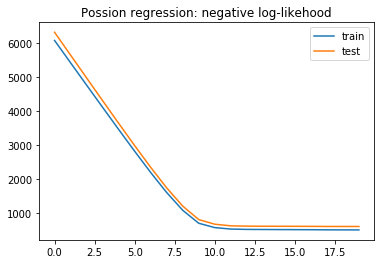

In [19]:
result.plot.line(title = 'Possion regression: negative log-likehood')